In [7]:
import torch
import time
from script.NeuralNets.Networks import SequentialNN
from script.settings import device, data_type
import script.DHOV.MultiDHOV as multidhov
from script.Verification.Verifier import SingleNeuronVerifier, MILPVerifier
import gurobipy as grp
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from script.NeuralNets.ICNNFactory import ICNNFactory
import matplotlib.pyplot as plt
from script import eval
import numpy as np
import script.DHOV.DataSampling as ds

In [8]:
def imshow(img):
    img = img / 2 + .05  # revert normalization for viewing
    npimg = img.numpy()
    plt.imshow(npimg, cmap="gray")
    plt.show()

In [9]:
def get_verifier(icnn_factory):
    group_size = 5
    sample_count = 1000
    epochs = 200
    sampling_method = "per_group_sampling"
    dhov_verifier = multidhov.MultiDHOV()
    dhov_verifier.start_verification(nn, torch_image, icnn_factory, group_size, eps=eps, icnn_epochs=epochs,
                                     icnn_batch_size=10000, sample_count=sample_count, sample_new=False, use_over_approximation=True, break_after=5,
                                     sample_over_input_space=False, sample_over_output_space=True, tighten_bounds=True,
                                     use_fixed_neurons_in_grouping=False, sampling_method=sampling_method, layers_as_snr=[2,3,4], layers_as_milp=[],
                                     force_inclusion_steps=3, preemptive_stop=True, even_gradient_training=False,
                                     keep_ambient_space=True, data_grad_descent_steps=0, opt_steps_gd=100,
                                     train_outer=False, print_training_loss=False, print_new_bounds=False,
                                     grouping_method="consecutive", group_num_multiplier=5, store_samples=False, print_optimization_steps=False, print_last_loss=True,
                                     should_plot="none", optimizer="SdLBFGS", init_network=False, adapt_lambda="none")
    return dhov_verifier

In [10]:
transform = Compose([ToTensor(),  Normalize(0.5, 0.5)])
training_data = MNIST(root="../../mnist", train=True, download=True, transform=transform)

nn = SequentialNN([28 * 28 * 1, 256, 256, 256, 256, 10])
nn.load_state_dict(torch.load("../../mnist_fc 4x256.pth", map_location=torch.device('cpu')), strict=False)


parameter_list = list(nn.parameters())

output_size = 10
number_layer = (len(parameter_list) - 2) // 2

=========================================== 18 ===========================================


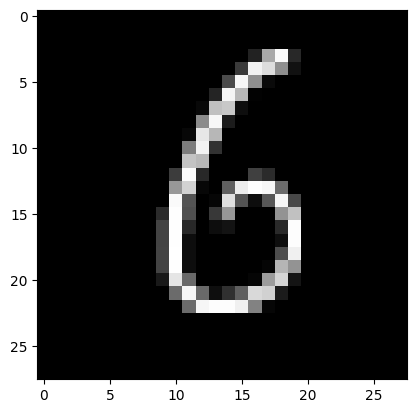

6
tensor([-172.0694, -176.8615, -162.1011, -177.4311, -169.6750, -166.8041,
        -183.9420, -177.7420, -171.6015, -172.2942], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor([161.3770, 166.0988, 169.6522, 170.3519, 179.9586, 193.6648, 167.5022,
        195.0780, 178.0849, 175.9675], dtype=torch.float64,
       grad_fn=<AddBackward0>)
nn classifies image correct as 6


In [11]:
image_index = 18
eps = 0.009


print("=========================================== {} ===========================================".format(image_index))
image, label = training_data.__getitem__(image_index)
torch_image = torch.unsqueeze(image, 0).to(dtype=data_type).to(device)
imshow(torch_image[0][0])
print(label)

input_flattened = torch.flatten(torch_image)
simple_bounds_affine_out, simple_bounds_layer_out = nn.calculate_box_bounds([input_flattened.add(-eps), input_flattened.add(eps)])
print(simple_bounds_affine_out[-1][0])
print(simple_bounds_affine_out[-1][1])

if torch.argmax(nn(torch_image)).item() == label:
    print("nn classifies image correct as {}".format(label))
else:
    print("nn classifies image wrong")


In [12]:
icnn_factory = ICNNFactory("standard", [5, 1], adapt_layer_for_init=True)
standard_verifier = get_verifier(icnn_factory)

C:\Users\Ufuk\Documents\Programming\ICNN_verification\script\DHOV\MultiDHOV.py:86: UserWarning: keep_ambient_space is True and sampling method is per_group_sampling. Keeping previous samples is not supported when using per group sampling
  warnings.warn("keep_ambient_space is True and sampling method is per_group_sampling. "
C:\Users\Ufuk\Documents\Programming\ICNN_verification\script\DHOV\MultiDHOV.py:95: UserWarning: value for group number multiplier is given with grouping method consecutive. consecutive grouping does not use variable number of groups
  warnings.warn("value for group number multiplier is given with grouping method consecutive. "



approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.015628337860107422
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.2133589288136026
test for without test setup
test run 1 iterations,  with mean loss = 0.2133589288136026
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.14218488961271075
test for without test setup
test run 1 iterations,  with mean loss = 0.14218488961271075
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.13427415858600922
test for without test setup
test run 1 iterations,  with mean loss = 0.13427415858600922
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.13115917974267244
test for without test setup
test run 1 iterations,  with mean loss = 0.13115917974267244
        time for training: 6.794217348098755
        actual veri

In [13]:
icnn_factory = ICNNFactory("logical", [5, 1], always_use_logical_layer=False)
logical_verifier = get_verifier(icnn_factory)


approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.011460542678833008
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 2.2965198849208495
test for without test setup
test run 1 iterations,  with mean loss = 0.45103085343649607
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 2.2914491365327034
test for without test setup
test run 1 iterations,  with mean loss = 0.5238167823876914
Stop after 41 Epochs
test for test setup
test run 1 iterations,  with mean loss = 2.2915058407687656
test for without test setup
test run 1 iterations,  with mean loss = 0.7664674622711051
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 2.2902276676107167
test for without test setup
test run 1 iterations,  with mean loss = 1.0352302207373154
        time for training: 6.341353893280029
        actual verificat

In [14]:
icnn_factory = ICNNFactory("approx_max",  [5, 1], maximum_function="SMU", function_parameter=0.3)
smu_verifier = get_verifier(icnn_factory)


approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.01908278465270996
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 1.238166764147679
test for without test setup
test run 1 iterations,  with mean loss = 1.2311992528276574
Stop after 21 Epochs
test for test setup
test run 1 iterations,  with mean loss = 1.2356273732759753
test for without test setup
test run 1 iterations,  with mean loss = 1.2301608852532373
Stop after 33 Epochs
test for test setup
test run 1 iterations,  with mean loss = 1.232648037147196
test for without test setup
test run 1 iterations,  with mean loss = 1.227542928072138
Stop after 33 Epochs
test for test setup
test run 1 iterations,  with mean loss = 1.2305982866399086
test for without test setup
test run 1 iterations,  with mean loss = 1.2258759395729013
        time for training: 4.356175661087036
        actual verification t

In [15]:
test_sample_count = 300000
for i in range(len(standard_verifier.list_of_icnns)):
    for k in range(len(standard_verifier.list_of_icnns[i])):
        standard_group = standard_verifier.all_group_indices[i][k]
        logical_group = logical_verifier.all_group_indices[i][k]
        smu_group = smu_verifier.all_group_indices[i][k]
        standard_bounds_layer_out = smu_verifier.bounds_layer_out
        index_to_select = torch.tensor(smu_group)
        if (np.array(standard_group) == np.array(logical_group)).all() and (np.array(standard_group) == np.array(smu_group)).all():
            test_samples = torch.zeros((0, len(index_to_select)), dtype=data_type)
            test_samples = ds.samples_uniform_over(test_samples, test_sample_count,[torch.index_select(standard_bounds_layer_out[i][0], 0, index_to_select), torch.index_select(standard_bounds_layer_out[i][1], 0, index_to_select)])

            standard_icnn = standard_verifier.list_of_icnns[i][k]
            standard_out = standard_icnn(test_samples)
            standard_include = torch.where(standard_out <= 0, 1, 0).sum()

            logical_icnn = logical_verifier.list_of_icnns[i][k]
            logical_out = logical_icnn(test_samples)
            logical_include = torch.where(logical_out <= 0, 1, 0).sum()

            smu_icnn = smu_verifier.list_of_icnns[i][k]
            smu_out = smu_icnn(test_samples)
            smu_include = torch.where(smu_out <= 0, 1, 0).sum()

            print("layer {}, group:{}, group_size: {}, standard: {}, logical: {}, smu: {}".format(i, k, len(index_to_select), standard_include, logical_include, smu_include))

layer 0, group:0, group_size: 5, standard: 238958, logical: 188719, smu: 0
layer 0, group:1, group_size: 5, standard: 167660, logical: 30692, smu: 0
layer 0, group:2, group_size: 5, standard: 176167, logical: 66790, smu: 0
layer 0, group:3, group_size: 5, standard: 180548, logical: 248303, smu: 0
layer 0, group:4, group_size: 5, standard: 118524, logical: 121875, smu: 0
